In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
csv_path = "USA NFL Arrest DATA.csv"
df = pd.read_csv(csv_path)

df.head(954)

,DATE,TEAM,NAME,POS,CASE,CATEGORY,DESCRIPTION,OUTCOME
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,Drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,Battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.
2,1/11/2020,NE,Julian Edelman,WR,Arrested,Vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,Domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,Disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...
...,...,...,...,...,...,...,...,...
949,2/16/2000,KC,Andre Rison,WR,Arrested,Theft,"Accused of renting but not returning a $1,100 ...","Pleaded no contest, sentenced to one year of p..."
950,2/6/2000,NYJ,Wayne Chrebet,WR,Arrested,Disorderly conduct,Accused of disorderly conduct in altercation o...,"Pleaded guilty to nuisance violation, fined $230."
951,2/6/2000,IND,Keith Elias,RB,Arrested,Disorderly conduct,Accused of resisting arrest and disorderly con...,"Pleaded guilty to nuisance violation, fined $230."
952,2/5/2000,CIN,Steve Foley,LB,Arrested,Domestic violence,Accused of kicking in the door of his son's mo...,Charge dropped after woman declined to cooperate.


In [2]:
new = df.CATEGORY.str.split(",", expand=True)
df['NEW'] = new[0]
df

,DATE,TEAM,NAME,POS,CASE,CATEGORY,DESCRIPTION,OUTCOME,NEW
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,Drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.,Drugs
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,Battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.,Battery
2,1/11/2020,NE,Julian Edelman,WR,Arrested,Vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.,Vandalism
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,Domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.,Domestic violence
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,Disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...,Disorderly conduct
...,...,...,...,...,...,...,...,...,...
951,2/6/2000,IND,Keith Elias,RB,Arrested,Disorderly conduct,Accused of resisting arrest and disorderly con...,"Pleaded guilty to nuisance violation, fined $230.",Disorderly conduct
952,2/5/2000,CIN,Steve Foley,LB,Arrested,Domestic violence,Accused of kicking in the door of his son's mo...,Charge dropped after woman declined to cooperate.,Domestic violence
953,2/3/2000,CAR,Fred Lane,RB,Arrested,"Drugs, gun","Police pulled him over in Jackson, Tenn., for ...",Indicted but shot and killed by his wife in Ju...,Drugs
954,1/31/2000,BAL,Ray Lewis,LB,Charged,Murder,Accused of murder in the stabbing deaths of tw...,"Pleaded guilty to obstruction of justice, one ...",Murder


In [3]:
offense = ['WR', 'RB', 'OT', 'TE', 'QB', 'OC', 'OG', 'FB', 'K', 'OL', 'C', 'P']
defense = ['CB', 'S', 'DT', 'LB', 'DE', 'DB', 'DT']

([<matplotlib.patches.Wedge at 0x12198ffd0>,
 [Text(0.12097746453691416, 1.0933272397019203, 'offense Players'),
  Text(-0.12097746453691405, -1.0933272397019203, 'Dewfense Players')],
 [Text(0.0659877079292259, 0.5963603125646837, '46.5%'),
  Text(-0.06598770792922584, -0.5963603125646837, '53.5%')])

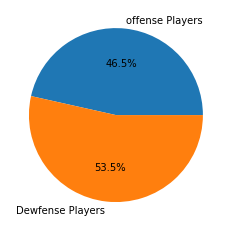

In [25]:
combo_df = df[["POS", "NEW"]]
offense_df = df.loc[df.POS.isin(offense), ["POS", "NEW"]]
defense_df = df.loc[df.POS.isin(defense), ["POS", "NEW"]]
sizes = [len(offense_df), len(defense_df)]
labelz = ["offense Players", "Dewfense Players"]
plt.pie(sizes, labels = labelz, autopct="%1.1f%%")



In [26]:
com_count = combo_df["POS"].value_counts()
com_count = pd.DataFrame(com_count)
com_count = com_count.rename(columns = {'POS':'Number of Crimes by players given offensive position'})
com_count.index.name = 'position'
com_count

,Number of Crimes by players given offensive position
position,
WR,155
LB,137
CB,126
RB,107
DT,89
S,79
DE,76
OT,53
TE,44


([<matplotlib.patches.Wedge at 0x121a27690>,
 [Text(0.9603631736193172, 0.536379133408295, 'WR'),
  Text(0.11186521832608855, 1.0942971136436652, 'LB'),
  Text(-0.759720850225108, 0.7955025013997374, 'CB'),
  Text(-1.0989963818463744, 0.04697821504248654, 'RB'),
  Text(-0.9070163175465809, -0.6223515081561546, 'DT'),
  Text(-0.445868777005703, -1.0055849211734627, 'S'),
  Text(0.10107167553344994, -1.095346756239713, 'DE'),
  Text(0.542679337521743, -0.9568171908086531, 'OT'),
  Text(0.8151979134986038, -0.7385474675520344, 'TE'),
  Text(0.9621205995404409, -0.5332203596449996, 'OG'),
  Text(1.0339363350477562, -0.37546724899518746, 'QB'),
  Text(1.0718431915791884, -0.24728965337300188, 'FB'),
  Text(1.0895394167075432, -0.15134021091761005, 'K'),
  Text(1.0962899247114581, -0.09026849381786302, 'C'),
  Text(1.0984798477224045, -0.05781024258523287, 'DB'),
  Text(1.0995189380948147, -0.0325285224203528, 'P'),
  Text(1.0998515163598375, -0.018073238806757545, 'OL'),
  Text(1.0999465449

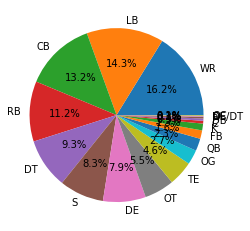

In [27]:
com_count.reset_index()
labels  = ['WR', 'LB', 'CB', 'RB', 'DT', 'S', 'DE', 'OT', 'TE', 'OG', 'QB', 'FB', 'K', 'C', 'DB', 'P', 'OL', 
           'DE/DT', 'OC']
num = com_count['Number of Crimes by players given offensive position']
plt.pie(num, labels = labels, autopct="%1.1f%%")
#FORMAT / MAKE PRETTY

In [5]:
off_count = offense_df["POS"].value_counts()
off_count = pd.DataFrame(off_count)
off_count = off_count.rename(columns = {'POS':'Number of Crimes by players given offensive position'})
off_count.index.name = 'position'
off_count

,Number of Crimes by players given offensive position
position,
WR,155
RB,107
OT,53
TE,44
OG,26
QB,22
FB,15
K,12
C,5


([<matplotlib.patches.Wedge at 0x121771850>,
 [Text(0.502161505924188, 0.9786898497317482, 'WR'),
  Text(-1.079987440041516, 0.20887108309331248, 'RB'),
  Text(-0.6478224395968355, -0.8890028609373563, 'OT'),
  Text(0.062232619872784195, -1.0982381804616745, 'TE'),
  Text(0.5767380655394029, -0.9366820184875269, 'OG'),
  Text(0.855839366909078, -0.6910419510049073, 'QB'),
  Text(1.0055321637973882, -0.4459877437429675, 'FB'),
  Text(1.0719236866449389, -0.24694049892539477, 'K'),
  Text(1.0938102815208615, -0.11652925829702152, 'C'),
  Text(1.0986510279911312, -0.05446024875109262, 'P'),
  Text(1.0997521889415516, -0.023347867531446326, 'OL'),
  Text(1.0999724647770086, -0.00778310557506983, 'OC')],
 [Text(0.2739062759586479, 0.5338308271264081, '34.9%'),
  Text(-0.5890840582044631, 0.11392968168726134, '24.1%'),
  Text(-0.3533576943255466, -0.4849106514203761, '11.9%'),
  Text(0.03394506538515501, -0.5990390075245497, '9.9%'),
  Text(0.3145843993851288, -0.5109174646295601, '5.9%'),
 

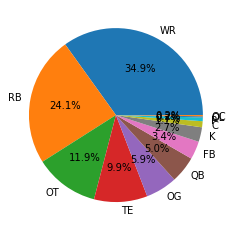

In [17]:
off_count.reset_index()
labels  = ['WR', 'RB', 'OT', 'TE', 'OG', 'QB', 'FB', 'K', 'C', 'P', 'OL', 'OC']
num = off_count['Number of Crimes by players given offensive position']
plt.pie(num, labels = labels, autopct="%1.1f%%")
#FORMAT / MAKE PRETTY

In [19]:
def_count = defense_df["POS"].value_counts()
def_count = pd.DataFrame(def_count)
def_count = def_count.rename(columns = {'POS':'Number of Crimes by players given defensive position'})
def_count.index.name = 'position'
def_count

,Number of Crimes by players given defensive position
position,
LB,137
CB,126
DT,89
S,79
DE,76
DB,4


([<matplotlib.patches.Wedge at 0x1217f2cd0>,
 [Text(0.7323507222174735, 0.8207694071220888, 'LB'),
  Text(-0.8536533720734141, 0.6937405281138544, 'CB'),
  Text(-0.8827093305605086, -0.6563720269339781, 'DT'),
  Text(0.11139365656173944, -1.0943452166833851, 'S'),
  Text(0.9565483303711487, -0.543153101495488, 'DE'),
  Text(1.0996674026964588, -0.027048169010575163, 'DB')],
 [Text(0.3994640303004401, 0.44769240388477566, '26.8%'),
  Text(-0.465629112040044, 0.3784039244257387, '24.7%'),
  Text(-0.4814778166693683, -0.35802110560035166, '17.4%'),
  Text(0.060760176306403325, -0.5969155727363918, '15.5%'),
  Text(0.5217536347478993, -0.29626532808844797, '14.9%'),
  Text(0.5998185832889774, -0.014753546733040995, '0.8%')])

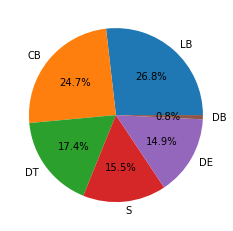

In [20]:
def_count.reset_index()
labels  = ['LB', 'CB', 'DT', 'S', 'DE', 'DB']
num = def_count['Number of Crimes by players given defensive position']
plt.pie(num, labels = labels, autopct="%1.1f%%")
#FORMAT / MAKE PRETTY